# Flight Delay Absorption Classification--Baseline Model

## Step 1: Data loading and merging

* Task: Analyze the provided flight and weather data from "flights.csv" and "weather.csv" by merging them based on date, airport code, and time specifications. Then download the merged data as a CSV file for classification model building.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

FLIGHT_PATH = "/content/aa_flights_entire.csv" # Change according to actual directories
WEATHER_PATH = "/content/All_Hubs_Weather_EDA.csv"
flight_df = pd.read_csv(FLIGHT_PATH)
weather_df = pd.read_csv(WEATHER_PATH)

print("Flight DataFrame head:")
display(flight_df.head())

print("\nWeather DataFrame head:")
display(weather_df.head())

Flight DataFrame head:


,FL_DATE,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,CRS_ARR_TIME,ARR_TIME,...,ORIGIN_UTC_OFFSET,DEST_UTC_OFFSET,CRS_DEP_TIME_UTC_MIN,DEP_TIME_UTC_MIN,CRS_ARR_TIME_UTC_MIN,ARR_TIME_UTC_MIN,CRS_DEP_TIME_UTC_HHMM,DEP_TIME_UTC_HHMM,CRS_ARR_TIME_UTC_HHMM,ARR_TIME_UTC_HHMM
0,2023-01-01,AA,1,JFK,LAX,730,726.0,743.0,1052,1054.0,...,-5,-8,750,746.0,1132,1134.0,1230,1226,1852,1854
1,2023-01-02,AA,1,JFK,LAX,730,723.0,742.0,1052,1037.0,...,-5,-8,750,743.0,1132,1117.0,1230,1223,1852,1837
2,2023-01-03,AA,1,JFK,LAX,730,807.0,829.0,1052,1140.0,...,-5,-8,750,787.0,1132,1180.0,1230,1307,1852,1940
3,2023-01-04,AA,1,JFK,LAX,730,727.0,747.0,1052,1039.0,...,-5,-8,750,747.0,1132,1119.0,1230,1227,1852,1839
4,2023-01-05,AA,1,JFK,LAX,730,725.0,746.0,1052,1046.0,...,-5,-8,750,745.0,1132,1126.0,1230,1225,1852,1846



Weather DataFrame head:


,station,time,temp_C,dewpoint_C,wind_dir_deg,wind_speed_kt,visibility_mi,pressure_mb,weather,Sky
0,KDFW,2023-01-01 00:00:00,18.0,7.0,180.0,8.0,10.0,1008.130685,NaN,"[('CLR', None, None)]"
1,KDFW,2023-01-01 00:00:00,18.3,6.7,180.0,7.0,NaN,NaN,NaN,NaN
2,KDFW,2023-01-01 00:05:00,18.0,7.0,180.0,8.0,10.0,1007.792045,NaN,"[('CLR', None, None)]"
3,KDFW,2023-01-01 00:10:00,19.0,7.0,180.0,8.0,10.0,1008.130685,NaN,"[('CLR', None, None)]"
4,KDFW,2023-01-01 00:15:00,19.0,7.0,180.0,7.0,10.0,1008.130685,NaN,"[('CLR', None, None)]"


In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399618 entries, 0 to 399617
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                399618 non-null  object 
 1   MKT_UNIQUE_CARRIER     399618 non-null  object 
 2   OP_CARRIER_FL_NUM      399618 non-null  int64  
 3   ORIGIN                 399618 non-null  object 
 4   DEST                   399618 non-null  object 
 5   CRS_DEP_TIME           399618 non-null  int64  
 6   DEP_TIME               399618 non-null  float64
 7   WHEELS_OFF             399618 non-null  float64
 8   CRS_ARR_TIME           399618 non-null  int64  
 9   ARR_TIME               399618 non-null  float64
 10  WHEELS_ON              399618 non-null  float64
 11  CANCELLED              399618 non-null  float64
 12  DIVERTED               399618 non-null  float64
 13  YEAR                   399618 non-null  int64  
 14  MONTH                  399618 non-nu

In [ ]:
weather_df.value_counts('weather')

,count
weather,
"[('-', None, 'RA', None, None)]",63668
"[('', None, '', 'BR', None)]",52607
"[('-', None, 'RA', None, None), ('', None, '', 'BR', None)]",32797
"[('', None, '', 'HZ', None)]",15524
"[('', None, 'RA', None, None), ('', None, '', 'BR', None)]",12798
...,...
"[('-', None, 'SNDZ', None, None)]",1
"[('VC', 'TS', '', None, None), ('+', None, 'RA', None, None), ('', None, '', 'FG', None)]",1
"[('VC', 'TS', '', None, None), ('', None, 'PL', None, None), ('', None, '', 'BR', None)]",1


In [ ]:
len(flight_df)

399618

In [ ]:
# Convert 'FL_DATE' in flight_df to datetime objects
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'])

# Convert 'time' in weather_df to datetime objects
weather_df['time'] = pd.to_datetime(weather_df['time'])

# Create combined datetime columns for merging in flight_df
def combine_date_time(row, date_col, time_col):
    if pd.isna(row[date_col]) or pd.isna(row[time_col]):
        return pd.NaT
    # Ensure the time column is treated as a string in HH:MM format
    # Assuming the original time columns (DEP_TIME, ARR_TIME) are in a format like HMM or HHMM
    # Convert to string, pad with leading zeros if necessary, and format
    time_str = str(int(row[time_col])).zfill(4)
    hour = time_str[:2]
    minute = time_str[2:]
    # Combine date and time strings and convert to datetime
    try:
        return pd.to_datetime(f"{row[date_col].date()} {hour}:{minute}")
    except ValueError:
        return pd.NaT


flight_df['DEP_DATETIME'] = flight_df.apply(lambda row: combine_date_time(row, 'FL_DATE', 'DEP_TIME'), axis=1)
flight_df['ARR_DATETIME'] = flight_df.apply(lambda row: combine_date_time(row, 'FL_DATE', 'ARR_TIME'), axis=1)


# Extract airport code from 'station' in weather_df
weather_df['airport_code'] = weather_df['station'].str[-3:]

# Round weather time to the nearest 5 minutes and create combined datetime
weather_df['weather_time_rounded'] = weather_df['time'].dt.round('5min')


display(flight_df.head())
display(weather_df.head())

,FL_DATE,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,CRS_ARR_TIME,ARR_TIME,...,CRS_DEP_TIME_UTC_MIN,DEP_TIME_UTC_MIN,CRS_ARR_TIME_UTC_MIN,ARR_TIME_UTC_MIN,CRS_DEP_TIME_UTC_HHMM,DEP_TIME_UTC_HHMM,CRS_ARR_TIME_UTC_HHMM,ARR_TIME_UTC_HHMM,DEP_DATETIME,ARR_DATETIME
0,2023-01-01,AA,1,JFK,LAX,730,726.0,743.0,1052,1054.0,...,750,746.0,1132,1134.0,1230,1226,1852,1854,2023-01-01 07:26:00,2023-01-01 10:54:00
1,2023-01-02,AA,1,JFK,LAX,730,723.0,742.0,1052,1037.0,...,750,743.0,1132,1117.0,1230,1223,1852,1837,2023-01-02 07:23:00,2023-01-02 10:37:00
2,2023-01-03,AA,1,JFK,LAX,730,807.0,829.0,1052,1140.0,...,750,787.0,1132,1180.0,1230,1307,1852,1940,2023-01-03 08:07:00,2023-01-03 11:40:00
3,2023-01-04,AA,1,JFK,LAX,730,727.0,747.0,1052,1039.0,...,750,747.0,1132,1119.0,1230,1227,1852,1839,2023-01-04 07:27:00,2023-01-04 10:39:00
4,2023-01-05,AA,1,JFK,LAX,730,725.0,746.0,1052,1046.0,...,750,745.0,1132,1126.0,1230,1225,1852,1846,2023-01-05 07:25:00,2023-01-05 10:46:00


,station,time,temp_C,dewpoint_C,wind_dir_deg,wind_speed_kt,visibility_mi,pressure_mb,weather,Sky,airport_code,weather_time_rounded
0,KDFW,2023-01-01 00:00:00,18.0,7.0,180.0,8.0,10.0,1008.130685,NaN,"[('CLR', None, None)]",DFW,2023-01-01 00:00:00
1,KDFW,2023-01-01 00:00:00,18.3,6.7,180.0,7.0,NaN,NaN,NaN,NaN,DFW,2023-01-01 00:00:00
2,KDFW,2023-01-01 00:05:00,18.0,7.0,180.0,8.0,10.0,1007.792045,NaN,"[('CLR', None, None)]",DFW,2023-01-01 00:05:00
3,KDFW,2023-01-01 00:10:00,19.0,7.0,180.0,8.0,10.0,1008.130685,NaN,"[('CLR', None, None)]",DFW,2023-01-01 00:10:00
4,KDFW,2023-01-01 00:15:00,19.0,7.0,180.0,7.0,10.0,1008.130685,NaN,"[('CLR', None, None)]",DFW,2023-01-01 00:15:00


In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399618 entries, 0 to 399617
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                399618 non-null  datetime64[ns]
 1   MKT_UNIQUE_CARRIER     399618 non-null  object        
 2   OP_CARRIER_FL_NUM      399618 non-null  int64         
 3   ORIGIN                 399618 non-null  object        
 4   DEST                   399618 non-null  object        
 5   CRS_DEP_TIME           399618 non-null  int64         
 6   DEP_TIME               399618 non-null  float64       
 7   WHEELS_OFF             399618 non-null  float64       
 8   CRS_ARR_TIME           399618 non-null  int64         
 9   ARR_TIME               399618 non-null  float64       
 10  WHEELS_ON              399618 non-null  float64       
 11  CANCELLED              399618 non-null  float64       
 12  DIVERTED               399618 non-null  floa

* Task: Drop missing values in departure/arrival time for valid merging

In [ ]:
# Drop rows with missing departure datetime
flight_df_dep = flight_df.dropna(subset=['DEP_DATETIME']).sort_values('DEP_DATETIME')

# Step 1: Merge flight data with departure weather data
merged_dep_weather = pd.merge_asof(
    flight_df_dep,
    weather_df.sort_values('weather_time_rounded'),
    left_on='DEP_DATETIME',
    right_on='weather_time_rounded',
    left_by='ORIGIN',
    right_by='airport_code',
    direction='nearest',
    tolerance=pd.Timedelta('5 minutes')
)

# Select and rename weather columns for departure
departure_weather_cols = ['temp_C', 'dewpoint_C', 'wind_dir_deg', 'wind_speed_kt', 'visibility_mi', 'pressure_mb', 'weather', 'Sky']
# Ensure all columns exist before renaming
existing_departure_weather_cols = [col for col in departure_weather_cols if col in merged_dep_weather.columns]
rename_dict_dep = {col: f'DEP_{col}' for col in existing_departure_weather_cols}
merged_dep_weather = merged_dep_weather.rename(columns=rename_dict_dep)


# Drop weather_time_rounded and airport_code from departure merge result to avoid conflicts in the next merge
merged_dep_weather = merged_dep_weather.drop(columns=['weather_time_rounded', 'airport_code'], errors='ignore')

# Drop rows with missing arrival datetime from the departure merged dataframe
merged_dep_weather_arr = merged_dep_weather.dropna(subset=['ARR_DATETIME']).sort_values('ARR_DATETIME')

# Align arrival time minus one hour to avoid data leakage
weather_arr_df = weather_df.copy()
weather_arr_df['weather_time_rounded'] = weather_arr_df['weather_time_rounded'] - pd.Timedelta(hours=1)

# Step 1: Merge flight data with departure weather data
# Step 2: Merge flight data with arrival weather data
merged_arr_weather = pd.merge_asof(
    merged_dep_weather_arr,
    weather_arr_df.sort_values('weather_time_rounded'),
    left_on='ARR_DATETIME',
    right_on='weather_time_rounded',
    left_by='DEST',
    right_by='airport_code',
    direction='nearest',
    tolerance=pd.Timedelta('5 minutes')
)

# Select and rename weather columns for arrival
arrival_weather_cols = ['temp_C', 'dewpoint_C', 'wind_dir_deg', 'wind_speed_kt', 'visibility_mi', 'pressure_mb', 'weather', 'Sky']
# Ensure all columns exist before renaming
existing_arrival_weather_cols = [col for col in arrival_weather_cols if col in merged_arr_weather.columns]
rename_dict_arr = {col: f'ARR_{col}' for col in existing_arrival_weather_cols}
merged_df = merged_arr_weather.rename(columns=rename_dict_arr)

# Drop intermediate columns used for merging and redundant weather columns from the second merge
# We need to be careful here to only drop columns that were not renamed or are truly intermediate
cols_to_drop = [
    'weather_time_rounded', 'airport_code_x', 'airport_code_y', # airport_code might be duplicated with suffixes after merge
    'time_x', 'time_y', # Original time columns from weather_df
    'station_x', 'station_y' # Original station columns from weather_df
]

# Drop original weather columns from the second merge that might still have their original names
# These would be the columns from weather_df that were not successfully merged in the first step
original_weather_cols = ['temp_C', 'dewpoint_C', 'wind_dir_deg', 'wind_speed_kt', 'visibility_mi', 'pressure_mb', 'weather', 'Sky']
cols_to_drop.extend(original_weather_cols)


# Also drop weather columns from the first merge that were not renamed, before the second merge happened
# These columns would have the original names and are redundant after the second merge
# Check for columns that should have been renamed but might not have been
potentially_unrenamed_dep_cols = [col for col in departure_weather_cols if f'DEP_{col}' not in merged_df.columns and col in merged_df.columns]
cols_to_drop.extend(potentially_unrenamed_dep_cols)

# Drop the intermediate DEP_DATETIME and ARR_DATETIME if they were not dropped earlier
cols_to_drop.extend(['DEP_DATETIME', 'ARR_DATETIME'])

# Drop columns, ignoring errors for columns that might not exist
merged_df = merged_df.drop(columns=list(set(cols_to_drop)), errors='ignore')


print("Merged DataFrame head:")
display(merged_df.head())

Merged DataFrame head:


,FL_DATE,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,CRS_ARR_TIME,ARR_TIME,...,DEP_Sky,ARR_temp_C,ARR_dewpoint_C,ARR_wind_dir_deg,ARR_wind_speed_kt,ARR_visibility_mi,ARR_pressure_mb,ARR_weather,ARR_Sky,airport_code
0,2023-01-01,AA,1950,MIA,DFW,2120,2216.0,2228.0,2348,6.0,...,"[('FEW', <metar.Datatypes.distance object at 0...",18.0,7.0,180.0,8.0,10.00,1008.469324,NaN,"[('CLR', None, None)]",DFW
1,2023-01-01,AA,1091,CLT,PHL,2240,2240.0,2257.0,23,7.0,...,NaN,12.0,11.0,230.0,5.0,4.00,1010.162523,"[('', None, 'RA', None, None), ('', None, '', ...","[('OVC', <metar.Datatypes.distance object at 0...",PHL
2,2023-01-01,AA,185,JFK,LAX,2030,2024.0,2047.0,16,8.0,...,"[('CLR', None, None)]",15.0,14.0,180.0,8.0,10.00,1012.533002,NaN,"[('BKN', <metar.Datatypes.distance object at 0...",LAX
3,2023-01-01,AA,1245,CLT,DCA,2011,2227.0,2249.0,2130,8.0,...,"[('BKN', <metar.Datatypes.distance object at 0...",12.8,12.2,180.0,6.0,0.75,1010.501163,"[('-', None, 'RA', None, None), ('', None, '',...","[('SCT', <metar.Datatypes.distance object at 0...",DCA
4,2023-01-01,AA,2362,MIA,DCA,2118,2116.0,2136.0,2359,9.0,...,"[('SCT', <metar.Datatypes.distance object at 0...",12.8,12.2,180.0,6.0,0.75,1010.501163,"[('-', None, 'RA', None, None), ('', None, '',...","[('SCT', <metar.Datatypes.distance object at 0...",DCA


In [ ]:
print(flight_df.columns)

Index(['FL_DATE', 'MKT_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'CRS_ARR_TIME', 'ARR_TIME',
       'WHEELS_ON', 'CANCELLED', 'DIVERTED', 'YEAR', 'MONTH', 'AIRCRAFT_TYPE',
       'DESCRIPTION', 'CRS_DEP_TIME_MIN', 'DEP_TIME_MIN', 'CRS_ARR_TIME_MIN',
       'ARR_TIME_MIN', 'dep_delay', 'arr_delay', 'delta_delay',
       'delay_change_flag', 'ORIGIN_UTC_OFFSET', 'DEST_UTC_OFFSET',
       'CRS_DEP_TIME_UTC_MIN', 'DEP_TIME_UTC_MIN', 'CRS_ARR_TIME_UTC_MIN',
       'ARR_TIME_UTC_MIN', 'CRS_DEP_TIME_UTC_HHMM', 'DEP_TIME_UTC_HHMM',
       'CRS_ARR_TIME_UTC_HHMM', 'ARR_TIME_UTC_HHMM', 'DEP_DATETIME',
       'ARR_DATETIME'],
      dtype='object')


In [ ]:
len(flight_df)

399618

* Task: Save merged file

In [ ]:
from google.colab import drive

# Define the path to save the merged DataFrame in your Google Drive
output_path = "/content/drive/My Drive/Capstone Project AA/merged_flight_weather.csv"

# Save the merged DataFrame to a CSV file
merged_df.to_csv(output_path, index=False)

print(f"Merged data saved to {output_path}")

In [10]:
import pandas as pd
MERGED_DATA_PATH = "/content/model_final.csv"
merged_df = pd.read_csv(MERGED_DATA_PATH)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399618 entries, 0 to 399617
Data columns (total 75 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  399618 non-null  object 
 1   MKT_UNIQUE_CARRIER       399618 non-null  object 
 2   OP_CARRIER_FL_NUM        399618 non-null  int64  
 3   ORIGIN                   399618 non-null  object 
 4   DEST                     399618 non-null  object 
 5   CRS_DEP_TIME             399618 non-null  int64  
 6   DEP_TIME                 399618 non-null  int64  
 7   WHEELS_OFF               399618 non-null  float64
 8   CRS_ARR_TIME             399618 non-null  int64  
 9   ARR_TIME                 399618 non-null  int64  
 10  WHEELS_ON                399618 non-null  float64
 11  CANCELLED                399618 non-null  float64
 12  DIVERTED                 399618 non-null  float64
 13  YEAR                     399618 non-null  int64  
 14  MONT

## Step 2: Prepare target variable

* Task: Create a new multiclass column in the `merged_df` DataFrame called `delta_delay_class` that divides `delta_delay` into 8 buckets based on boundaries at -30, -20, -10, 0, 10, 20, 30. This allows us to classify flights into different categories of delay absorption/magnification.


**Reasoning**:
Calculate delta_delay and create the multiclass delta_delay_class column with 7 buckets using boundaries at -30, -20, -10, 0, 10, 20, 30.



In [11]:
merged_df['delta_delay'] = merged_df['arr_delay'] - merged_df['dep_delay']
# Create multiclass delta_delay_class with 7 buckets
# [-inf, -30], (-30, -20], (-20, -10], (-10, 0], (0, 10], (10, 20], (20, 30], (30, +inf]

bins = [-float('inf'), -30, -20, -10, 0, 10, 20, 30, float('inf')]  # 8 edges = 7 intervals
labels = [0, 1, 2, 3, 4, 5, 6, 7]  # 8 classes: 0 to 6
merged_df['delta_delay_class'] = pd.cut(merged_df['delta_delay'], bins=bins, labels=labels, include_lowest=True).astype(int)

display(merged_df[['arr_delay', 'dep_delay', 'delta_delay', 'delta_delay_class']].head())
print("\nDelta delay class distribution:")
print(merged_df['delta_delay_class'].value_counts().sort_index())
print("\nClass boundaries:")
print("Class 0: <= -30")
print("Class 1: (-30, -20]")
print("Class 2: (-20, -10]")
print("Class 3: (-10, 0]")
print("Class 4: (0, 10]")
print("Class 5: (10, 20]")
print("Class 6: (20, 30]")
print("Class 7: (30, +inf)")

,arr_delay,dep_delay,delta_delay,delta_delay_class
0,16.0,44.0,-28.0,1
1,-24.0,-3.0,-21.0,1
2,-8.0,-6.0,-2.0,3
3,-6.0,6.0,-12.0,2
4,-16.0,0.0,-16.0,2



Delta delay class distribution:
delta_delay_class
0     18658
1     55468
2    116516
3    110202
4     56278
5     22817
6      9441
7     10238
Name: count, dtype: int64

Class boundaries:
Class 0: <= -30
Class 1: (-30, -20]
Class 2: (-20, -10]
Class 3: (-10, 0]
Class 4: (0, 10]
Class 5: (10, 20]
Class 6: (20, 30]
Class 7: (30, +inf)


## Step 3: Feature selection and preprocessing
* Task: Feature selection. Select relevant numerical features and handle any remaining missing values or outliers in those features.


**Reasoning**:
Inspect the merged_df DataFrame to identify all columns with numerical data types and create a list of numerical columns relevant for modeling, including the target variable. Then, identify columns with missing values and their percentages to determine handling strategies.



In [12]:
# Identify numerical columns
# numerical_cols = merged_df.select_dtypes(include=['number']).columns.tolist()
# print("All numerical columns:", numerical_cols)

# Select relevant numerical columns for modeling, including the target
# Exclude text-based columns and the specified columns

relevant_numerical_cols = [
    'MONTH',
    'DEP_visibility_mi',
    'ARR_visibility_mi',
    'ARR_wind_speed_kt',
    'DEP_wind_speed_kt',
    'ARR_dewpoint_C',
    'DEP_dewpoint_C',
    'ARR_temp_C',
    'DEP_temp_C',
    'DEP_pressure_mb',
    'ARR_pressure_mb',
    'ARR_wind_dir_deg',
    'DEP_wind_dir_deg',
    'AIRCRAFT_TYPE',
    'dep_delay',
    'FLIGHT_DIRECTION_VECTOR', # Include the direction vector
    'delta_delay_class' # Include the target variable
]

# Filter numerical_cols to include only those in relevant_numerical_cols
numerical_cols = [col for col in relevant_numerical_cols if col in merged_df.columns]


print("\nRelevant numerical columns for modeling:", numerical_cols)

# Identify missing values in selected numerical columns
missing_numerical_values = merged_df[numerical_cols].isnull().sum()
print("\nMissing values per relevant numerical column:")
print(missing_numerical_values[missing_numerical_values > 0])

# Calculate percentage of missing values
missing_numerical_percentage = merged_df[numerical_cols].isnull().mean() * 100
print("\nPercentage of missing values per relevant numerical column:")
print(missing_numerical_percentage[missing_numerical_percentage > 0])


Relevant numerical columns for modeling: ['MONTH', 'DEP_visibility_mi', 'ARR_visibility_mi', 'ARR_wind_speed_kt', 'DEP_wind_speed_kt', 'ARR_dewpoint_C', 'DEP_dewpoint_C', 'ARR_temp_C', 'DEP_temp_C', 'DEP_pressure_mb', 'ARR_pressure_mb', 'ARR_wind_dir_deg', 'DEP_wind_dir_deg', 'AIRCRAFT_TYPE', 'dep_delay', 'FLIGHT_DIRECTION_VECTOR', 'delta_delay_class']

Missing values per relevant numerical column:
DEP_visibility_mi      625
ARR_visibility_mi      756
ARR_wind_speed_kt    26677
DEP_wind_speed_kt    24808
ARR_dewpoint_C        9891
DEP_dewpoint_C        9361
ARR_temp_C            6223
DEP_temp_C            6323
DEP_pressure_mb        387
ARR_pressure_mb        387
ARR_wind_dir_deg     29961
DEP_wind_dir_deg     27749
dtype: int64

Percentage of missing values per relevant numerical column:
DEP_visibility_mi    0.156399
ARR_visibility_mi    0.189181
ARR_wind_speed_kt    6.675625
DEP_wind_speed_kt    6.207929
ARR_dewpoint_C       2.475114
DEP_dewpoint_C       2.342487
ARR_temp_C         

* Task: Split data. Split the processed data into training and testing sets.


In [13]:
from sklearn.impute import SimpleImputer
import numpy as np

# Select only the relevant numerical columns for X
X = merged_df[numerical_cols].drop(columns=['delta_delay_class']) # Exclude the target

# Define target variable y
y = merged_df['delta_delay_class']

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Identify columns in X_train with missing values
cols_to_impute_median = X_train.columns[X_train.isnull().any()].tolist()

# Impute missing values with the median for the identified columns in X_train
for col in cols_to_impute_median:
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)

# Impute missing values in X_test with the median from X_train for the same columns
for col in cols_to_impute_median:
    median_val = X_train[col].median() # Use median from X_train
    X_test[col] = X_test[col].fillna(median_val)


# Check for remaining missing values in X_train and X_test
print("Missing values in X_train after imputation:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


# Identify and handle outliers using capping (1st and 99th percentile)
# Exclude binary columns and those where outliers are expected (like delay times)
# Use columns from the updated X_train for capping
cols_to_cap = X_train.columns.tolist()


for col in cols_to_cap:
    if col in X_train.columns: # Check if column exists in X_train
        lower_bound = X_train[col].quantile(0.01)
        upper_bound = X_train[col].quantile(0.99)
        X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)
        X_test[col] = X_test[col].clip(lower=lower_bound, upper=upper_bound)


# Display descriptive statistics of processed numerical features in X_train
print("\nDescriptive statistics of X_train after handling missing values and outliers:")
display(X_train.describe())

# Verify no remaining missing values in the imputed columns in X_train and X_test
print("\nMissing values in X_train after capping and imputation verification:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("\nMissing values in X_test after capping and imputation verification:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])

Missing values in X_train after imputation:
Series([], dtype: int64)

Missing values in X_test after imputation:
Series([], dtype: int64)

Descriptive statistics of X_train after handling missing values and outliers:


,MONTH,DEP_visibility_mi,ARR_visibility_mi,ARR_wind_speed_kt,DEP_wind_speed_kt,ARR_dewpoint_C,DEP_dewpoint_C,ARR_temp_C,DEP_temp_C,DEP_pressure_mb,ARR_pressure_mb,ARR_wind_dir_deg,DEP_wind_dir_deg,AIRCRAFT_TYPE,dep_delay,FLIGHT_DIRECTION_VECTOR
count,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000,319694.000000
mean,6.563220,9.437975,9.445425,6.706679,6.298908,9.868910,9.915981,18.380078,17.781703,1016.027950,1015.965448,167.786665,167.254343,732.812521,13.294970,167.840235
std,3.442057,1.705967,1.690952,4.017341,3.977565,9.338109,9.310665,9.275406,9.299894,6.230221,6.207175,104.870624,106.838949,81.714340,39.085311,102.483456
min,1.000000,1.500000,1.500000,0.000000,0.000000,-13.000000,-12.200000,-3.000000,-4.000000,1000.341969,1000.003329,0.000000,0.000000,614.000000,-11.000000,11.000000
25%,4.000000,10.000000,10.000000,4.000000,4.000000,3.000000,3.000000,12.000000,11.000000,1012.194362,1011.855722,80.000000,80.000000,698.000000,-4.000000,67.000000
50%,7.000000,10.000000,10.000000,7.000000,5.000000,11.000000,11.000000,19.000000,18.000000,1015.580760,1015.580760,170.000000,170.000000,699.000000,-1.000000,193.000000
75%,10.000000,10.000000,10.000000,9.000000,9.000000,18.000000,18.000000,26.000000,25.000000,1019.983078,1019.644438,250.000000,250.000000,838.000000,11.000000,270.000000
max,12.000000,10.000000,10.000000,18.000000,18.000000,25.000000,25.000000,38.000000,38.000000,1032.512750,1032.512750,360.000000,360.000000,889.000000,228.000000,357.000000



Missing values in X_train after capping and imputation verification:
Series([], dtype: int64)

Missing values in X_test after capping and imputation verification:
Series([], dtype: int64)


In [ ]:
y_train.value_counts()

,count
delta_delay_class,
2,93230
3,88336
4,44845
1,44113
5,18269
0,14920
7,8205
6,7476


In [ ]:
y_test.value_counts()

,count
delta_delay_class,
2,23169
3,21793
4,11385
1,11268
5,4533
0,3719
7,2024
6,1958


## Step 4: Model selection and training

* Task: Model selection. For baseline, we choose a most simple logistic regression model which could serve as comparison to other advanced models.

**Reasoning**:
Choose and train a Logistic Regression model on the training data using the selected features.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    tree_method="hist",    # or "gpu_hist" if your build supports it
    random_state=42
)

param_grid = {
    "n_estimators": [500, 1000],
    "learning_rate": [0.3, 0.1],
    "max_depth": [6, 8],
    "subsample": [1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3],
}

random_search = RandomizedSearchCV(
    estimator=xgb,                 # ✅ instance, not class
    param_distributions=param_grid,
    n_iter=30,
    scoring="accuracy",
    cv=cv,
    n_jobs=2,                      # maybe 2 instead of -1 to be gentle on RAM
    verbose=1,
    refit=True,
    random_state=42,
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=Non...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=2,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.3, 0.1],
                                        'max_depth': [6, 8],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [500, 1000],
                                        'subsample': [1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
print("Best params:", random_search.best_params_)
print(f"Best CV accuracy: {random_search.best_score_:.4f}")

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification report:\n", classification_report(y_test, y_pred))

Best params: {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best CV accuracy: 0.3135

Classification report:
               precision    recall  f1-score   support

           0       0.42      0.12      0.19      3719
           1       0.30      0.07      0.11     11268
           2       0.32      0.58      0.41     23169
           3       0.32      0.46      0.38     21793
           4       0.25      0.04      0.07     11385
           5       0.15      0.01      0.02      4533
           6       0.13      0.01      0.01      1958
           7       0.36      0.07      0.12      2024

    accuracy                           0.32     79849
   macro avg       0.28      0.17      0.16     79849
weighted avg       0.30      0.32      0.26     79849



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing features
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics for multiclass classification
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"\nMacro-averaged metrics:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1-score: {f1_macro:.4f}")
print(f"\nWeighted-averaged metrics:")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall: {recall_weighted:.4f}")
print(f"F1-score: {f1_weighted:.4f}")

Accuracy: 0.3179

Macro-averaged metrics:
Precision: 0.2815
Recall: 0.1695
F1-score: 0.1625

Weighted-averaged metrics:
Precision: 0.2981
Recall: 0.3179
F1-score: 0.2606


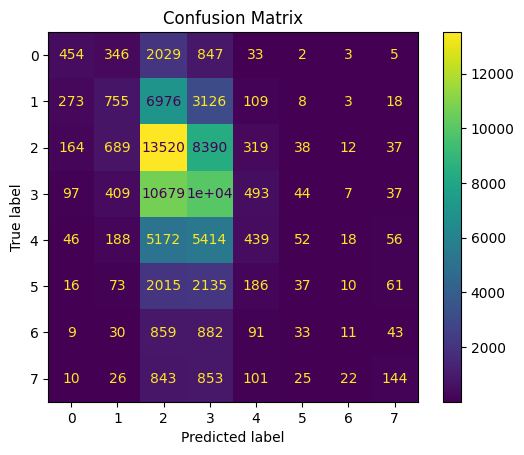

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
# Pass the model's classes if available, otherwise use unique values from y_test
display_labels = best_model.classes_ if hasattr(best_model, 'classes_') else sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix
disp.plot()

# Add a title to the plot
plt.title("Confusion Matrix")

# Display the plot
plt.show()

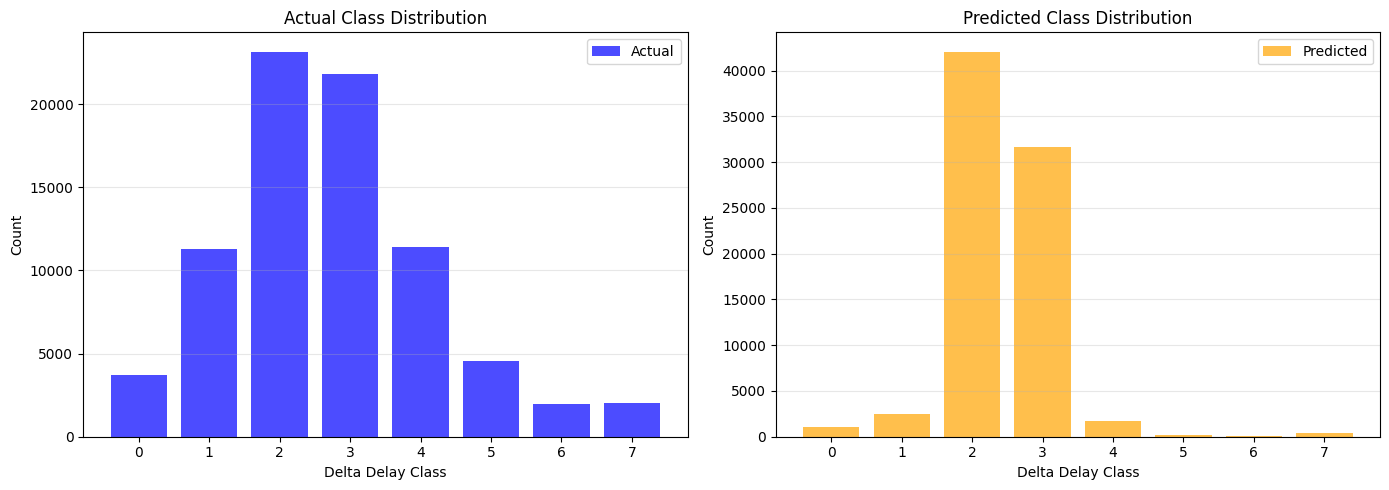

In [ ]:
# Note: ROC curve is typically for binary classification
# For multiclass, we can plot class distribution instead
import matplotlib.pyplot as plt
import numpy as np

# Plot class distribution in predictions vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Actual class distribution
unique_actual, counts_actual = np.unique(y_test, return_counts=True)
ax1.bar(unique_actual, counts_actual, alpha=0.7, color='blue', label='Actual')
ax1.set_xlabel('Delta Delay Class')
ax1.set_ylabel('Count')
ax1.set_title('Actual Class Distribution')
ax1.set_xticks(unique_actual)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Predicted class distribution
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
ax2.bar(unique_pred, counts_pred, alpha=0.7, color='orange', label='Predicted')
ax2.set_xlabel('Delta Delay Class')
ax2.set_ylabel('Count')
ax2.set_title('Predicted Class Distribution')
ax2.set_xticks(unique_pred)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

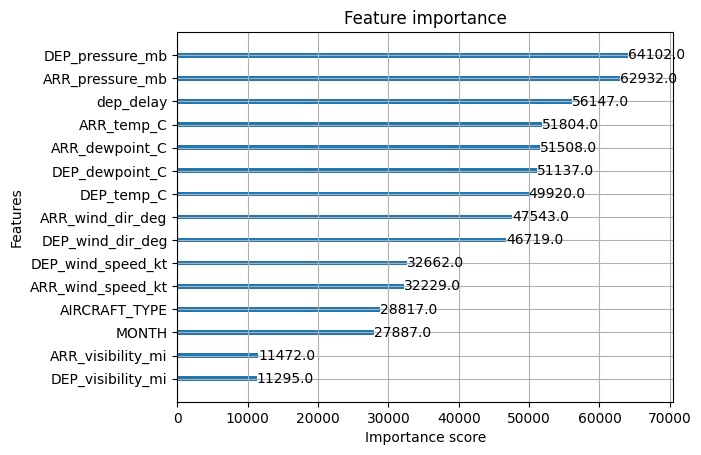

In [ ]:
import xgboost

xgboost.plot_importance(best_model)


## Step 5: Train per-origin XGBoost models

*Task: Split the training data by `ORIGIN` for the major hubs of interest and fit a separate XGBoost classifier for each subset to understand hub-specific behavior.*


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

origin_hubs = ['DFW', 'LAX', 'PHX', 'ORD', 'CLT', 'MIA', 'DCA', 'PHL', 'LGA', 'JFK']
origin_models = {}
origin_results = []

# Fixed best hyper-parameters from prior tuning
best_params = {
    'subsample': 1.0,
    'n_estimators': 500,
    'min_child_weight': 3,
    'max_depth': 8,
    'learning_rate': 0.1,
    'colsample_bytree': 0.8,
}

for origin in origin_hubs:
    subset = merged_df[merged_df['ORIGIN'] == origin].copy()
    if subset.empty:
        print(f"Skipping {origin}: no matching flights in merged_df.")
        continue

    X_origin = subset[numerical_cols].drop(columns=['delta_delay_class']).copy()
    y_origin = subset['delta_delay_class'].copy()

    if y_origin.nunique() < 2:
        print(f"Skipping {origin}: target has <2 classes after filtering.")
        continue

    stratify_target = y_origin if y_origin.nunique() > 1 else None
    try:
        X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(
            X_origin, y_origin, test_size=0.2, random_state=42, stratify=stratify_target
        )
    except ValueError as exc:
        print(f"Stratified split failed for {origin} ({exc}), falling back to unstratified split.")
        X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(
            X_origin, y_origin, test_size=0.2, random_state=42, stratify=None
        )

    cols_to_impute = X_train_o.columns[X_train_o.isnull().any()].tolist()
    for col in cols_to_impute:
        median_val = X_train_o[col].median()
        X_train_o[col] = X_train_o[col].fillna(median_val)
        X_test_o[col] = X_test_o[col].fillna(median_val)

    for col in X_train_o.columns:
        lower_bound = X_train_o[col].quantile(0.01)
        upper_bound = X_train_o[col].quantile(0.99)
        X_train_o[col] = X_train_o[col].clip(lower=lower_bound, upper=upper_bound)
        X_test_o[col] = X_test_o[col].clip(lower=lower_bound, upper=upper_bound)

    origin_model = XGBClassifier(
        objective="multi:softprob",
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        **best_params,
    )
    origin_model.fit(X_train_o, y_train_o)

    y_pred_o = origin_model.predict(X_test_o)
    accuracy_o = accuracy_score(y_test_o, y_pred_o)
    macro_f1_o = f1_score(y_test_o, y_pred_o, average='macro')
    weighted_f1_o = f1_score(y_test_o, y_pred_o, average='weighted')

    origin_models[origin] = {
        'model': origin_model,
        'X_test': X_test_o,
        'y_test': y_test_o,
        'y_pred': y_pred_o,
    }
    origin_results.append(
        {
            'origin': origin,
            'train_samples': len(X_train_o),
            'test_samples': len(X_test_o),
            'accuracy': accuracy_o,
            'macro_f1': macro_f1_o,
            'weighted_f1': weighted_f1_o,
        }
    )

origin_results_df = pd.DataFrame(origin_results)
display(origin_results_df.sort_values('accuracy', ascending=False))


,origin,train_samples,test_samples,accuracy,macro_f1,weighted_f1
0,DFW,49169,12293,0.353453,0.184661,0.315625
2,PHX,28608,7152,0.346337,0.189266,0.318714
4,CLT,40396,10099,0.338251,0.176282,0.300170
1,LAX,32973,8244,0.337094,0.209659,0.314444
3,ORD,37920,9481,0.331611,0.212453,0.300026
5,MIA,40645,10162,0.307813,0.170174,0.273694
8,LGA,23011,5753,0.304015,0.228071,0.286288
7,PHL,24726,6182,0.298771,0.214326,0.275936
6,DCA,24300,6076,0.279954,0.177276,0.254486
9,JFK,17942,4486,0.269951,0.200923,0.256317


*Task: Split the training data by `DESTINATION` for the major hubs of interest and fit a separate XGBoost classifier for each subset to understand hub-specific behavior.*

In [ ]:
dest_hubs = ['DFW', 'LAX', 'PHX', 'ORD', 'CLT', 'MIA', 'DCA', 'PHL', 'LGA', 'JFK']
dest_models = {}
dest_results = []

# Fixed best hyper-parameters from prior tuning
best_params = {
    'subsample': 1.0,
    'n_estimators': 500,
    'min_child_weight': 3,
    'max_depth': 8,
    'learning_rate': 0.1,
    'colsample_bytree': 0.8,
}

for dest in dest_hubs:
    subset = merged_df[merged_df['DEST'] == dest].copy()
    if subset.empty:
        print(f"Skipping {dest}: no matching flights in merged_df.")
        continue

    X_dest = subset[numerical_cols].drop(columns=['delta_delay_class']).copy()
    y_dest = subset['delta_delay_class'].copy()

    if y_dest.nunique() < 2:
        print(f"Skipping {dest}: target has <2 classes after filtering.")
        continue

    stratify_target = y_dest if y_dest.nunique() > 1 else None
    try:
        X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
            X_dest, y_dest, test_size=0.2, random_state=42, stratify=stratify_target
        )
    except ValueError as exc:
        print(f"Stratified split failed for {dest} ({exc}), falling back to unstratified split.")
        X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
            X_dest, y_dest, test_size=0.2, random_state=42, stratify=None
        )

    cols_to_impute = X_train_d.columns[X_train_d.isnull().any()].tolist()
    for col in cols_to_impute:
        median_val = X_train_d[col].median()
        X_train_d[col] = X_train_d[col].fillna(median_val)
        X_test_d[col] = X_test_d[col].fillna(median_val)

    for col in X_train_d.columns:
        lower_bound = X_train_d[col].quantile(0.01)
        upper_bound = X_train_d[col].quantile(0.99)
        X_train_d[col] = X_train_d[col].clip(lower=lower_bound, upper=upper_bound)
        X_test_d[col] = X_test_d[col].clip(lower=lower_bound, upper=upper_bound)

    dest_model = XGBClassifier(
        objective="multi:softprob",
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        **best_params,
    )
    dest_model.fit(X_train_d, y_train_d)

    y_pred_d = dest_model.predict(X_test_d)
    accuracy_d = accuracy_score(y_test_d, y_pred_d)
    macro_f1_d = f1_score(y_test_d, y_pred_d, average='macro')
    weighted_f1_d = f1_score(y_test_d, y_pred_d, average='weighted')

    dest_models[dest] = {
        'model': dest_model,
        'X_test': X_test_d,
        'y_test': y_test_d,
        'y_pred': y_pred_d,
    }
    dest_results.append(
        {
            'dest': dest,
            'train_samples': len(X_train_d),
            'test_samples': len(X_test_d),
            'accuracy': accuracy_d,
            'macro_f1': macro_f1_d,
            'weighted_f1': weighted_f1_d,
        }
    )

dest_results_df = pd.DataFrame(dest_results)
display(dest_results_df.sort_values('accuracy', ascending=False))


,dest,train_samples,test_samples,accuracy,macro_f1,weighted_f1
8,LGA,22961,5741,0.357255,0.195424,0.323623
2,PHX,28604,7152,0.331516,0.215455,0.304791
7,PHL,24722,6181,0.331500,0.169814,0.296856
6,DCA,24220,6055,0.324360,0.153890,0.286583
0,DFW,49041,12261,0.321833,0.225784,0.297614
4,CLT,40389,10098,0.317885,0.170088,0.280937
3,ORD,37953,9489,0.311519,0.173123,0.275281
5,MIA,40560,10141,0.307465,0.191403,0.275925
1,LAX,33044,8261,0.295848,0.213960,0.275735
9,JFK,17896,4474,0.286321,0.192296,0.265093
